# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈


The stock price forecast is one of the most preferred topics and most interesting topics in the science industry. However, stock market price forecasts are challenging compared to other price forecasting case studies. Many scholars and industry experts have come to a greater consensus a decade. They have studied stocks in various fields such as Computer Science, Economics, Business Arithmetic, and Marketing price forecasts. The stock has been identified according to them as a random walking behavior at market prices. The sudden rises and falls have been the main reason behind stock market price forecasting being a big challenge. An efficient and accurate. stock market forecasting model will help managers, investors, and decision-makers make the right decisions regarding their investments. Machine learning techniques used to predict stock prices include the analysis of historical data to predict the likelihood of a future event or to predict future performance. This is done by looking at patterns of data that include current and past information and finding the most suitable predictive models.

# ✅ **Bayesian Ridge Regression** ✅

Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
!pip install yfinance

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into the Data Frame**

In [3]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100


# **Data Preprocessing**

In [4]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1,1,1,0.020672
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000


In [5]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2014-01-02,3.850000,3.98,3.840000,3.950000,3.950000,20548400,1,1,1,0.020672
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,0,0.012106
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510


# **Dataset Cleaning and Null Value Testing**

In [6]:
# See how many null values in each column

dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

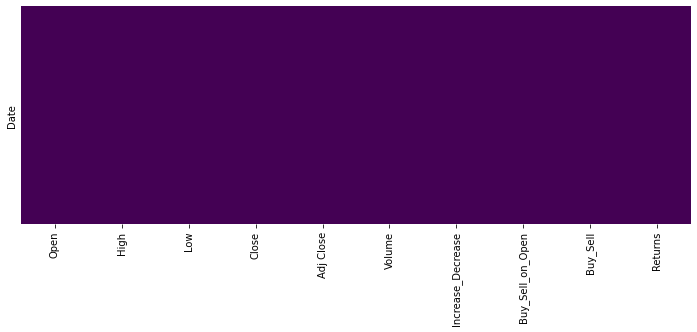

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [8]:
# see number of rows, number of columns
dataset.shape

(1171, 10)

In [9]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  11710


In [10]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [11]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1171 entries, 2014-01-02 to 2018-08-24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1171 non-null   float64
 1   High               1171 non-null   float64
 2   Low                1171 non-null   float64
 3   Close              1171 non-null   float64
 4   Adj Close          1171 non-null   float64
 5   Volume             1171 non-null   int64  
 6   Increase_Decrease  1171 non-null   int32  
 7   Buy_Sell_on_Open   1171 non-null   int32  
 8   Buy_Sell           1171 non-null   int32  
 9   Returns            1171 non-null   float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 86.9 KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

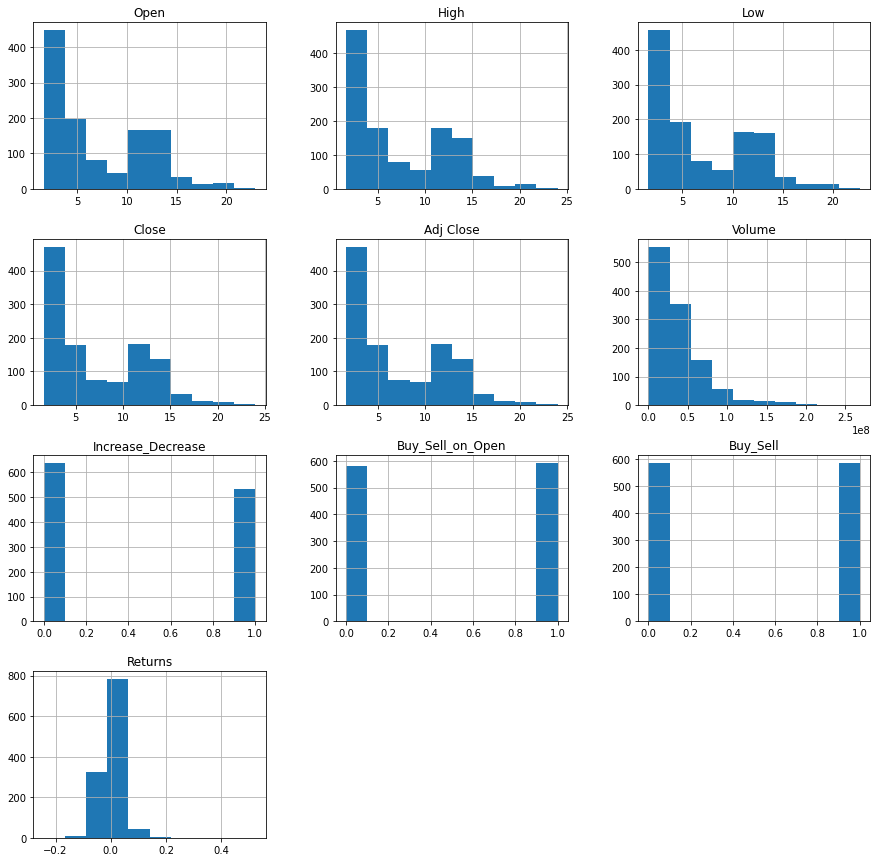

In [12]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [13]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1.171000e+03,1171.000000,1171.000000,1171.000000,1171.000000
mean,6.998651,7.143945,6.852844,7.000196,7.000196,3.761912e+07,0.455167,0.505551,0.499573,0.002257
std,4.854418,4.952265,4.752834,4.860349,4.860349,3.354346e+07,0.498199,0.500183,0.500213,0.038101
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.000000,0.000000,0.000000,-0.242291
25%,2.710000,2.780000,2.660000,2.705000,2.705000,1.308165e+07,0.000000,0.000000,0.000000,-0.015962
50%,4.250000,4.350000,4.170000,4.270000,4.270000,2.900080e+07,0.000000,1.000000,0.000000,0.000706
75%,11.565000,11.770000,11.305000,11.550000,11.550000,5.057790e+07,1.000000,1.000000,1.000000,0.018312
max,22.910000,24.000000,22.670000,23.980000,23.980000,2.683365e+08,1.000000,1.000000,1.000000,0.522901


# **Define X and Y**

In [14]:
X = dataset['Open'].values.reshape(1171,-1)
y = dataset['Adj Close'].values.reshape(1171,-1)

In [15]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [16]:
model.coef_

array([1.00004692])

In [17]:
model.scores_

array([-2932.45938573,    26.76283089,    26.76285935])

# **Split Train Data and Test Data**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Dataset Traning and Model Traning**

In [20]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [21]:
model.coef_

array([1.00009599])

In [22]:
model.scores_

array([-2350.81301562,    14.63586156,    14.63591733,    14.63591733])

# **Comparison of Actual Values and Predicted Values**

In [23]:
y_pred = model.predict(X_test)

# **Accuracy and Loss Function Values of the Model**

In [24]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean_Absolute_Error(MAE): 0.14934009718560823
Mean_Squared_Error(MSE): 0.052705710742660505
Root_Mean_Squared_Error(RMSE): 0.22957724352091283


In [25]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9976425571460996
